## 📌 Khmer Sentiment Analysis using Pretrained Hugging Face Model
## Based on Open-Source Model: tykea/khmer-text-sentiment-analysis-roberta

In [20]:
# Install Required Libraries
!pip install transformers datasets torch --quiet


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [21]:
# Import Libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd


In [22]:
# Load Pretrained Khmer Sentiment Model
model_name = "tykea/khmer-text-sentiment-analysis-roberta"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

khmer_sentiment = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


Device set to use mps:0


In [23]:
# Test Sample Khmer Sentences
sample_texts = [
    "ខ្ញុំស្រលាញ់ការសេវាកម្មនេះ។",  # I love this service.
    "ផលិតផលមិនល្អឡើយ។",  # The product is not good.
    "ការដឹកជញ្ជូនយឺតបន្តិច។",  # Delivery is a bit slow.
]

for text in sample_texts:
    result = khmer_sentiment(text)
    print(f"📝 Text: {text}\n🔍 Prediction: {result}\n")


📝 Text: ខ្ញុំស្រលាញ់ការសេវាកម្មនេះ។
🔍 Prediction: [{'label': 'LABEL_1', 'score': 0.9864945411682129}]

📝 Text: ផលិតផលមិនល្អឡើយ។
🔍 Prediction: [{'label': 'LABEL_0', 'score': 0.965076744556427}]

📝 Text: ការដឹកជញ្ជូនយឺតបន្តិច។
🔍 Prediction: [{'label': 'LABEL_0', 'score': 0.8326029777526855}]



In [24]:
import pandas as pd
df = pd.read_csv("khmer_sentiment_sample.csv")

# Predict sentiment for all reviews
df["predicted_sentiment"] = df["Review"].apply(lambda x: khmer_sentiment(x)[0]["label"])

df.head()


,Review,SENTIMEN,predicted_sentiment
0,ខ្ញុំស្រលាញ់ផលិតផលនេះ។,positive,LABEL_1
1,សេវាកម្មល្អណាស់។,positive,LABEL_1
2,ខ្ញុំពេញចិត្តជាមួយនឹងការទិញនេះ។,positive,LABEL_1
3,វាជាបទពិសោធន៍ដ៏អស្ចារ្យ។,positive,LABEL_1
4,ការផ្តល់សេវាជួសជុលលឿន និងមានប្រសិទ្ធភាព។,positive,LABEL_1


In [25]:
# Predict Sentiment for All Reviews
df["predicted_sentiment"] = df["Review"].apply(lambda x: khmer_sentiment(x)[0]["label"])

df.head(15)


,Review,SENTIMEN,predicted_sentiment
0,ខ្ញុំស្រលាញ់ផលិតផលនេះ។,positive,LABEL_1
1,សេវាកម្មល្អណាស់។,positive,LABEL_1
2,ខ្ញុំពេញចិត្តជាមួយនឹងការទិញនេះ។,positive,LABEL_1
3,វាជាបទពិសោធន៍ដ៏អស្ចារ្យ។,positive,LABEL_1
4,ការផ្តល់សេវាជួសជុលលឿន និងមានប្រសិទ្ធភាព។,positive,LABEL_1
5,ខ្ញុំសូមណែនាំឲ្យមនុស្សផ្សេងទៀត។,positive,LABEL_1
6,ផលិតផលមានគុណភាពខ្ពស់។,positive,LABEL_1
7,វាមានតម្លៃសមរម្យនឹងគុណភាព។,positive,LABEL_1
8,សេវាកម្មអតិថិជនល្អណាស់។,positive,LABEL_1
9,បុគ្គលិករួសរាយរាក់ទាក់។,positive,LABEL_1


In [26]:
print("Predicted unique labels:", df["predicted_sentiment"].unique())
print("True unique labels:", df["SENTIMEN"].unique())


Predicted unique labels: ['LABEL_1' 'LABEL_0']
True unique labels: ['positive' 'negative']


In [27]:
# Save Results
df.to_csv("predicted_khmer_sentiment.csv", index=False)
print("✅ Prediction results saved to: dataset/predicted_khmer_sentiment.csv")


✅ Prediction results saved to: dataset/predicted_khmer_sentiment.csv


In [28]:
label_map = {
    "LABEL_0": "negative",
    "LABEL_1": "positive",
    "negative": "negative",
    "positive": "positive",
}
df["predicted_sentiment_fixed"] = df["predicted_sentiment"].map(label_map)


In [29]:
df["SENTIMEN"] = df["SENTIMEN"].str.lower()
df["predicted_sentiment_fixed"] = df["predicted_sentiment_fixed"].str.lower()


In [ ]:
# Evaluate Accuracy
from sklearn.metrics import classification_report

print(classification_report(df["SENTIMEN"], df["predicted_sentiment_fixed"]))


              precision    recall  f1-score   support

    negative       0.96      0.93      0.95        28
    positive       0.90      0.95      0.93        20

    accuracy                           0.94        48
   macro avg       0.93      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



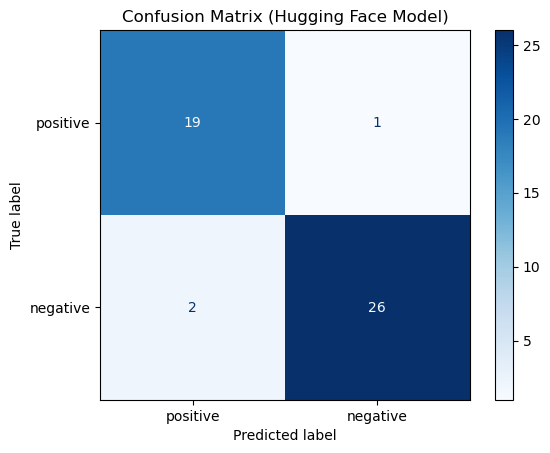

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    df["SENTIMEN"], df["predicted_sentiment_fixed"], labels=["positive", "negative"]
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["positive", "negative"]
)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Hugging Face Model)")
plt.show()
